In [38]:
import pandas as pd
import geopandas as gp
import numpy as np
%matplotlib inline

In [260]:
on_park = pd.read_csv('E:\Transit-Casa-Alex\Input\Parking\Demand/On Street Parking Demand.csv')

In [40]:
on_park.head()

,MAZ,Average Hourly Price
0,10001,0
1,10002,0
2,10003,0
3,10004,0
4,10005,0


In [261]:
on_park['Average Hourly Price'].unique()

array([  0, 200, 350, 203, 137,  93, 274, 191, 317, 213, 201, 211, 218,
       300, 166, 150, 158, 400, 423, 361,  55, 394, 387, 217, 190, 255,
       207, 227, 179, 351, 411, 318, 194, 172, 147, 186, 117, 231, 171,
       313, 236, 301, 170, 187, 154, 259, 267, 244, 155, 396, 475, 181,
       125, 142,  75,  58, 151, 182, 180, 462, 189, 174, 162, 450, 454,
       383, 330,  73, 376, 323, 136, 130,  98, 261, 495, 399, 479, 159,
       164, 242, 252, 480, 245, 173, 273, 279, 336, 138, 327, 250, 425,
       406, 160, 525, 355, 206, 434, 500, 284, 175, 177, 215, 291, 275,
       303, 289, 277, 321, 122, 319, 280, 367, 127, 444, 131, 230, 214,
       212,  96, 228, 185, 357, 233, 272, 270, 334, 198, 121, 253, 306,
       310, 287, 246, 184, 309, 183, 161, 292, 297, 223, 168, 384, 340,
       108, 232, 167, 417, 178, 271,  82, 176, 316, 322, 342, 128, 220,
       240, 374, 281,  64, 140, 257, 315, 268, 205, 329, 375, 359, 362,
       258, 296, 341, 371, 467, 393, 345, 192,  89, 100, 210, 26

In [262]:
off_park = pd.read_csv('E:\Transit-Casa-Alex\Input\Parking\Demand/Off Street Parking Demand.csv')

In [263]:
off_park.head()

,MAZ,PRICE1HR,PRICE2HR,PRICE3HR,PRICE4HR,PRICE12HR,PRICEDAY,PRICEDAYDISCOUNT
0,10377,2000,2000,2000,2000,2000,2000,1460
1,13915,400,800,1200,1600,3000,3000,3000
2,12107,1200,1200,1200,1200,1200,1200,1200
3,16469,1000,1000,1000,1000,1000,1000,1000
4,12862,900,900,900,900,900,900,900


In [264]:
off_res = pd.read_csv('E:\Transit-Casa-Alex\Input\Parking\Demand/Off Street Residential Parking Demand.csv')

In [265]:
off_res.head()

,MAZ,parking_rate
0,0,0.704879
1,10001,1.195371
2,10002,1.135969
3,10003,1.081934
4,10004,1.127421


In [266]:
maz = gp.read_file('E:/Transit-Casa-Alex/Input/Parking/TAZ39785.shp')

In [9]:
maz.head()

,MAZ_ORIGIN,OBJECTID,Shape_Area,Shape_Le_1,Shape_Leng,TAZ,cen_x,cen_y,geometry
0,710009.0,1,7.579234e+05,3941.998378,3958.763167,2398,5.885731e+06,2.420910e+06,"POLYGON ((5886459.747847587 2420730.590284675,..."
1,710010.0,2,2.173770e+05,2407.741483,2417.979664,2398,5.887757e+06,2.420676e+06,"POLYGON ((5887604.462421671 2421103.923199415,..."
2,710011.0,3,2.108222e+05,1924.432794,1932.608340,2398,5.884468e+06,2.419749e+06,"POLYGON ((5884357.06734167 2419439.033484593, ..."
3,710012.0,4,4.342161e+05,2844.177492,2856.245591,2398,5.885039e+06,2.418368e+06,"POLYGON ((5884989.65794 2417847.645591259, 588..."
4,710013.0,5,1.089542e+06,4614.789760,4634.361075,2399,5.886024e+06,2.417794e+06,"POLYGON ((5886830.508589014 2417708.940160006,..."


In [41]:
maz.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 39785 entries, 0 to 39784
Data columns (total 9 columns):
MAZ_ORIGIN    39785 non-null float64
OBJECTID      39785 non-null int64
Shape_Area    39785 non-null float64
Shape_Le_1    39785 non-null float64
Shape_Leng    39785 non-null float64
TAZ           39785 non-null int64
cen_x         39785 non-null float64
cen_y         39785 non-null float64
geometry      39785 non-null object
dtypes: float64(6), int64(2), object(1)
memory usage: 2.7+ MB


In [194]:
maz.crs

{'datum': 'NAD83',
 'lat_0': 36.5,
 'lat_1': 37.06666666666667,
 'lat_2': 38.43333333333333,
 'lon_0': -120.5,
 'no_defs': True,
 'proj': 'lcc',
 'units': 'us-ft',
 'x_0': 2000000,
 'y_0': 500000.0000000001}

In [42]:
off_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4142 entries, 0 to 4141
Data columns (total 2 columns):
MAZ             4142 non-null int64
parking_rate    3768 non-null float64
dtypes: float64(1), int64(1)
memory usage: 64.8 KB


In [267]:
def clean_row(row):
    if row == -99:
        row = np.nan
    else:
        row = row
    return row

In [268]:
on_park['Average Hourly Price'] = on_park['Average Hourly Price'].apply(lambda row: clean_row(row))

In [269]:
off_res = off_res.groupby(by = 'MAZ',as_index = False).mean()
on_park = on_park.groupby(by = 'MAZ',as_index = False).mean()
off_park = off_park.groupby(by = 'MAZ',as_index = False).mean()

In [270]:
demand = on_park.merge(off_res,how = 'outer',on = 'MAZ').merge(off_park,how = 'outer',on = 'MAZ')

In [271]:
len(demand)

4154

In [272]:
on_park.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4148 entries, 0 to 4147
Data columns (total 2 columns):
MAZ                     4148 non-null int64
Average Hourly Price    4148 non-null float64
dtypes: float64(1), int64(1)
memory usage: 97.2 KB


In [229]:
off_park.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 280 entries, 0 to 279
Data columns (total 8 columns):
MAZ                 280 non-null int64
PRICE1HR            280 non-null float64
PRICE2HR            280 non-null float64
PRICE3HR            280 non-null float64
PRICE4HR            280 non-null float64
PRICE12HR           280 non-null float64
PRICEDAY            280 non-null float64
PRICEDAYDISCOUNT    280 non-null float64
dtypes: float64(7), int64(1)
memory usage: 19.7 KB


In [273]:
print(len(on_park))
print(len(off_res))
print(len(off_park))

4148
4142
280


In [231]:
len(maz)

39785

In [274]:
demand.head()

,MAZ,Average Hourly Price,parking_rate,PRICE1HR,PRICE2HR,PRICE3HR,PRICE4HR,PRICE12HR,PRICEDAY,PRICEDAYDISCOUNT
0,10001,0.0,1.195371,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10002,0.0,1.135969,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10003,0.0,1.081934,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10004,0.0,1.127421,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10005,0.0,0.964046,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [285]:
final = maz.merge(demand,how = 'right',left_on='MAZ_ORIGIN',right_on = 'MAZ')

In [237]:
len(final)

4154

In [182]:
final.head(8)

,MAZ_ORIGIN,OBJECTID,Shape_Area,Shape_Le_1,Shape_Leng,TAZ,cen_x,cen_y,geometry,MAZ,Average Hourly Price,parking_rate,PRICE1HR,PRICE2HR,PRICE3HR,PRICE4HR,PRICE12HR,PRICEDAY,PRICEDAYDISCOUNT
0,111621.0,15034.0,1.624034e+05,1767.163053,1772.434968,1204.0,5.994393e+06,2.086065e+06,"POLYGON ((5994715.133042425 2085960.327739924,...",111621,NaN,1.631579,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,112337.0,15350.0,1.590939e+05,1899.914165,1905.583198,1205.0,5.999480e+06,2.086080e+06,"POLYGON ((5999318.461434171 2085867.938160926,...",112337,NaN,1.631579,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,112663.0,15506.0,2.205685e+06,6841.216239,6861.600948,1191.0,5.987680e+06,2.085200e+06,"POLYGON ((5988085.514411926 2086447.249338254,...",112663,NaN,2.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,113251.0,15788.0,3.190924e+06,13625.181844,13665.781937,1206.0,6.004345e+06,2.084850e+06,"POLYGON ((6004616.45182243 2085688.459189177, ...",113251,NaN,1.631579,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,118504.0,18332.0,3.527445e+05,3330.097458,3340.030914,1204.0,5.994110e+06,2.085884e+06,"POLYGON ((5994232.3587455 2085373.889608338, 5...",118504,NaN,1.631579,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,10001.0,18690.0,1.825054e+05,1794.292270,1799.750931,477.0,6.000506e+06,2.101398e+06,"POLYGON ((6000678.625052422 2101115.574988425,...",10001,-66.0,1.195371,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,10002.0,18691.0,1.810528e+05,1787.020998,1792.457196,477.0,6.001126e+06,2.101432e+06,"POLYGON ((6001297.896123588 2101149.720917508,...",10002,-66.0,1.135969,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,10003.0,18692.0,1.831748e+05,1791.115520,1796.581088,179.0,6.001946e+06,2.103818e+06,"POLYGON ((6002121.780958757 2103540.378209665,...",10003,-66.0,1.081934,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [286]:
final.columns

Index(['MAZ_ORIGIN', 'OBJECTID', 'Shape_Area', 'Shape_Le_1', 'Shape_Leng',
       'TAZ', 'cen_x', 'cen_y', 'geometry', 'MAZ', 'Average Hourly Price',
       'parking_rate', 'PRICE1HR', 'PRICE2HR', 'PRICE3HR', 'PRICE4HR',
       'PRICE12HR', 'PRICEDAY', 'PRICEDAYDISCOUNT'],
      dtype='object')

In [287]:
keep = ['Shape_Area', 'geometry','cen_x', 'cen_y', 'MAZ', 'Average Hourly Price',
       'parking_rate', 'PRICE1HR', 'PRICE2HR', 'PRICE3HR', 'PRICE4HR',
       'PRICE12HR', 'PRICEDAY', 'PRICEDAYDISCOUNT']

In [288]:
final2 = final[keep]

In [289]:
final2 = gp.GeoDataFrame(final2)

In [290]:
final2.crs 

In [291]:
final2.to_file('E:\Transit-Casa-Alex\Output\Parking Demand/Parking_Demand.shp',driver = 'ESRI Shapefile')

AttributeError: 'float' object has no attribute '__geo_interface__'

In [ ]:
stops = gp.read_file('E:/Transit-Casa-Alex/Input/Bus_Stops/Bus_Stops_USft.shp')

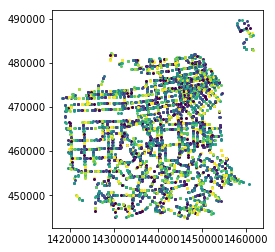

In [161]:
stops.plot()

In [245]:
stops.crs

{'datum': 'NAD83',
 'lat_0': 36.5,
 'lat_1': 37.06666666666667,
 'lat_2': 38.43333333333333,
 'lon_0': -120.5,
 'no_defs': True,
 'proj': 'lcc',
 'units': 'us-ft',
 'wktext': True,
 'x_0': 2000000,
 'y_0': 500000.0000000001}

In [246]:
stops = stops.to_crs(maz.crs)

In [247]:
maz.crs

{'datum': 'NAD83',
 'lat_0': 36.5,
 'lat_1': 37.06666666666667,
 'lat_2': 38.43333333333333,
 'lon_0': -120.5,
 'no_defs': True,
 'proj': 'lcc',
 'units': 'us-ft',
 'wktext': True,
 'x_0': 2000000,
 'y_0': 500000.0000000001}

In [248]:
parking = gp.sjoin(stops,maz,how = 'left', op = 'intersects')

In [249]:
stops[stops['STOP_ID'] == 390]

,STOP_ID,STOP_LAT,STOP_LON,geometry
0,390,37.72119,-122.475096,POINT (5990136.75776675 2091073.398817512)


In [250]:
maz[maz['MAZ_ORIGIN'] == 13562]

,MAZ_ORIGIN,OBJECTID,Shape_Area,Shape_Le_1,Shape_Leng,TAZ,cen_x,cen_y,geometry
20757,13562.0,20758,5.372744e+06,11837.531206,11873.125976,917,5.989211e+06,2.092196e+06,"POLYGON ((5989314.782294586 2092844.445205256,..."


In [251]:
parking[parking['STOP_ID'] == 390]

,STOP_ID,STOP_LAT,STOP_LON,geometry,index_right,MAZ_ORIGIN,OBJECTID,Shape_Area,Shape_Le_1,Shape_Leng,TAZ,cen_x,cen_y
0,390,37.72119,-122.475096,POINT (5990136.75776675 2091073.398817512),20757.0,13562.0,20758.0,5.372744e+06,11837.531206,11873.125976,917.0,5.989211e+06,2.092196e+06


In [252]:
len(stops)

3744

In [253]:
len(maz)

39785

In [254]:
len(parking)

3744

In [277]:
parking_demand = pd.merge(parking,demand, how = 'left',left_on = 'MAZ_ORIGIN',right_on = 'MAZ')

In [278]:
len(parking_demand)

3744

In [281]:
parking_demand.columns

Index(['STOP_ID', 'STOP_LAT', 'STOP_LON', 'geometry', 'index_right',
       'MAZ_ORIGIN', 'OBJECTID', 'Shape_Area', 'Shape_Le_1', 'Shape_Leng',
       'TAZ', 'cen_x', 'cen_y', 'MAZ', 'Average Hourly Price', 'parking_rate',
       'PRICE1HR', 'PRICE2HR', 'PRICE3HR', 'PRICE4HR', 'PRICE12HR', 'PRICEDAY',
       'PRICEDAYDISCOUNT'],
      dtype='object')

In [282]:
keep = ['STOP_ID', 'geometry','Average Hourly Price', 'parking_rate',
       'PRICE1HR', 'PRICE2HR', 'PRICE3HR', 'PRICE4HR', 'PRICE12HR', 'PRICEDAY',
       'PRICEDAYDISCOUNT']

In [283]:
parking_demand = parking_demand[keep]

In [284]:
parking_demand.to_csv('E:\Transit-Casa-Alex\Output\Parking Demand/Parking_Demand.csv')

In [292]:
parking_demand_geo = gp.GeoDataFrame(parking_demand)

In [294]:
parking_demand_geo.to_file('E:\Transit-Casa-Alex\Output\Parking Demand/Parking_Demand.shp')